<p style="font-size:300%; text-align:center"> Telco Customer Churn modeling</p>
<p style="font-size:150%; text-align:center"> Focused customer retention programs <br> MOD3 Project - 1. Obtain</p>


<b>Project objective:</b>
Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs <br> 
<b>Data: </b>
Data for this project is obtained from the [kaggel](https://www.kaggle.com/blastchar/telco-customer-churn) competition 
<br>
<b>1. What is the customer churn distribution ?</b> <br>
<b>2. What factors affects the churn ? </b> <br>
<b>3. What are the important features ? </b> <br>
<b>4. What models to be considered ? </b> <br>

In [1]:
# import important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import important and explore dataset

df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(6).T

,1246,1423,2764,3396,6417,5509
customerID,9408-HRXRK,0680-DFNNY,1810-MVMAI,5578-NKCXI,9776-CLUJA,1809-DMJHQ
gender,Female,Male,Male,Female,Female,Female
SeniorCitizen,0,0,0,0,1,0
Partner,Yes,Yes,Yes,Yes,Yes,No
Dependents,Yes,No,Yes,Yes,No,Yes
tenure,45,15,30,58,51,5
PhoneService,Yes,Yes,Yes,Yes,Yes,Yes
MultipleLines,Yes,Yes,Yes,No,Yes,No
InternetService,Fiber optic,Fiber optic,DSL,Fiber optic,Fiber optic,DSL
OnlineSecurity,Yes,No,Yes,Yes,Yes,No


## How does the target (churn) look like ? 

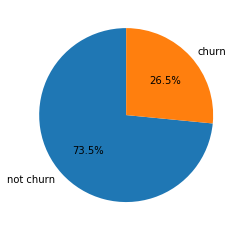

In [3]:
plt.pie(df["Churn"].value_counts(),labels=('not churn','churn'), autopct ='%1.1f%%', startangle = 90,labeldistance = 1.1)
plt.show()

There are only 26.5% of churn customers. Thus, class imballenced problem. This has to be accounted for in the modeling stage

## What are the features and their definitions ? 

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Information from [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn) about columns:

1.  <b>customerID</b>: Customer ID, it is unique value and has 7043 inputs. (this is removed from analysis)<br>
2.  <b>Catagorical variables</b>:<br>
3.  <b>gender</b>: Whether the customer is a male or a female.<br>
4.  <b>SeniorCitizen</b>: Whether the customer is a senior citizen or not (1, 0)<br>
5.  <b>Partner</b>: Whether the customer has a partner or not (Yes, No)<br>
6.  <b>Dependents</b>: Whether the customer has dependents or not (Yes, No)<br>
7.  <b>PhoneService</b>: Whether the customer has a phone service or not (Yes, No)<br>
8.  <b>MultipleLines</b>: Whether the customer has multiple lines or not (Yes, No, No phone service)<br>
9.  <b>InternetService</b>: Customer’s internet service provider (DSL, Fiber optic, No)<br>
10. <b>OnlineSecurity</b>: Whether the customer has online security or not (Yes, No, No internet service)<br>
11. <b>OnlineBackup</b>: Whether the customer has online backup or not (Yes, No, No internet service)<br>
12. <b>DeviceProtection</b>: Whether the customer has device protection or not (Yes, No, No internet service)<br>
13. <b>TechSupport</b>: Whether the customer has tech support or not (Yes, No, No internet service)<br>
14. <b>StreamingTV</b>: Whether the customer has streaming TV or not (Yes, No, No internet service)<br>
15. <b>StreamingMovies</b>: Whether the customer has streaming movies or not (Yes, No, No internet service)<br>
16. <b>Contract</b>: The contract term of the customer (Month-to-month, One year, Two year)<br>
17. <b>PaperlessBilling</b>: Whether the customer has paperless billing or not (Yes, No)<br>
18. <b>PaymentMethod</b>: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>


<b>Numerical variables</b>:<br>
1.  <b>tenure</b>: Number of months the customer has stayed with the company<br>
2.  <b>MonthlyCharges</b>: The amount charged to the customer monthly<br>
3.  <b>TotalCharges</b>: The total amount charged to the customer<br>

<b>Target variable</b>:<br>
<b>Churn</b>: Whether the customer churned or not (Yes or No) <br>